# 3. Modelling Long-Term Conditions (LTCs) and Multimorbidity

## From a Single Condition to Multiple Conditions

While understanding a single condition like frailty is important, the reality of modern healthcare is that many patients, particularly older ones, live with **multiple Long-Term Conditions (LTCs)**. This is known as **multimorbidity** (typically defined as having 2 or more LTCs).

Multimorbidity is a key driver of healthcare demand. A patient with diabetes, heart disease, and CKD has far more complex needs than a patient with only one of these. Planning diagnostic services requires an understanding of how many people fall into these high-need, multi-disease clusters.

## Choosing the Right PDF: The Poisson Distribution

We are no longer modelling a continuous score, but a **count**—the number of LTCs a person has (0, 1, 2, 3, etc.). This is discrete data. A classic statistical tool for modelling count data is the **Poisson distribution**.

The Poisson distribution is defined by a single parameter, `λ` (lambda), which represents the **average rate** or mean number of occurrences. In our case, `λ` is the average number of LTCs per person in the population.

Like the Beta distribution, this often results in a right-skewed shape: most people have 0 or 1 LTC, with a decreasing number of people having 2, 3, 4, or more.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

### Simulating the Number of LTCs in a Population

Let's simulate the number of LTCs for a population of 100,000 people. We'll assume the average number of LTCs per person (`λ`) is 1.5. This is a hypothetical value for illustration.

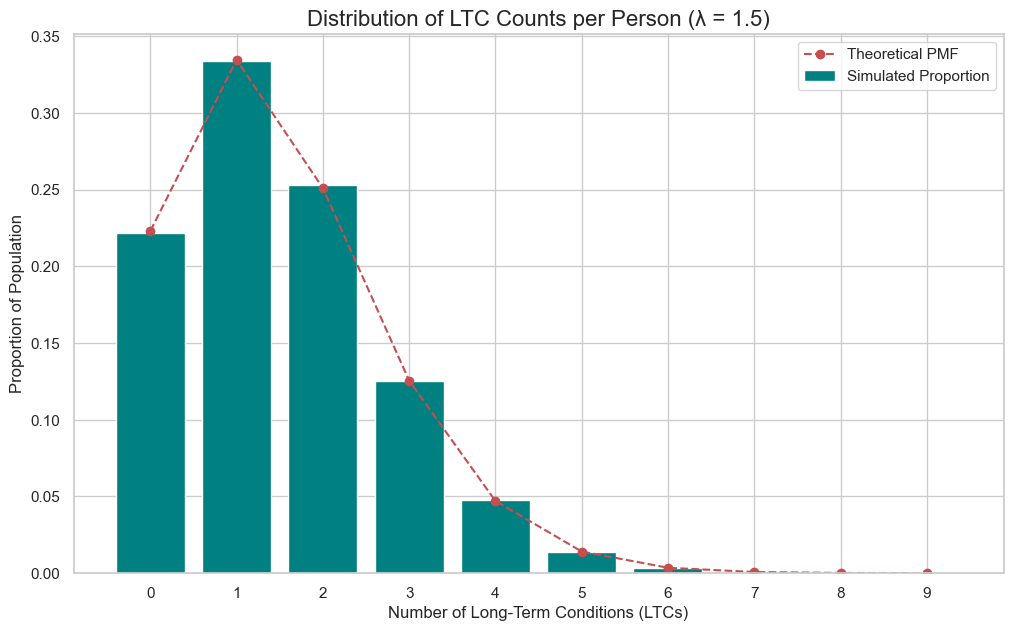

In [2]:
# Parameter for Poisson distribution: average number of LTCs per person
lambda_avg_ltcs = 1.5
population_size = 100000

# Generate the number of LTCs for each person in the population
ltc_counts = stats.poisson.rvs(mu=lambda_avg_ltcs, size=population_size, random_state=42)

# For discrete distributions, we plot a Probability Mass Function (PMF), not a PDF
unique_counts, count_frequencies = np.unique(ltc_counts, return_counts=True)
count_proportions = count_frequencies / population_size

plt.figure(figsize=(12, 7))
plt.bar(unique_counts, count_proportions, color='teal', label='Simulated Proportion')

# Overlay the theoretical PMF
x = np.arange(0, 10)
pmf_values = stats.poisson.pmf(x, mu=lambda_avg_ltcs)
plt.plot(x, pmf_values, 'ro--', label='Theoretical PMF')

plt.title(f'Distribution of LTC Counts per Person (λ = {lambda_avg_ltcs})', fontsize=16)
plt.xlabel('Number of Long-Term Conditions (LTCs)', fontsize=12)
plt.ylabel('Proportion of Population', fontsize=12)
plt.xticks(np.arange(0, 10))
plt.legend()
plt.show()

### Using the Distribution to Quantify Multimorbidity

The key policy and planning question is: "How many people have multimorbidity?" We can define this as anyone with 2 or more LTCs.

We can calculate this directly from our simulated data or by using the **Cumulative Distribution Function (CDF)** of the Poisson distribution. The probability of having 2 or more LTCs is `1 - P(having 0 or 1 LTC)`.

Average LTCs per person (λ): 1.5
---------------------------------------------------
Estimated number of people with 0 LTCs:      22,313 (22.3%)
Estimated number of people with 1 LTC:       33,469 (33.5%)
Estimated number of people with Multimorbidity (2+ LTCs): 44,217 (44.2%)


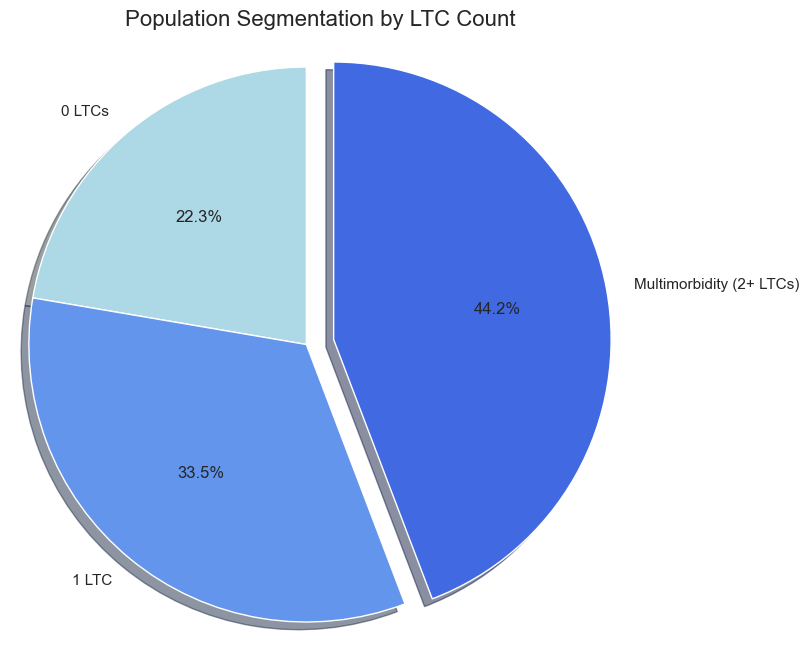

In [3]:
# Calculate using the theoretical CDF
# P(X < 2) = P(X=0) + P(X=1) which is cdf(1)
prob_less_than_2_ltcs = stats.poisson.cdf(1, mu=lambda_avg_ltcs)
prob_2_or_more_ltcs = 1 - prob_less_than_2_ltcs

count_multimorbidity = int(prob_2_or_more_ltcs * population_size)

# Calculate counts for each category
count_0_ltcs = int(stats.poisson.pmf(0, mu=lambda_avg_ltcs) * population_size)
count_1_ltc = int(stats.poisson.pmf(1, mu=lambda_avg_ltcs) * population_size)

print(f"Average LTCs per person (λ): {lambda_avg_ltcs}")
print("---------------------------------------------------")
print(f"Estimated number of people with 0 LTCs:      {count_0_ltcs:,} ({count_0_ltcs/population_size:.1%})")
print(f"Estimated number of people with 1 LTC:       {count_1_ltc:,} ({count_1_ltc/population_size:.1%})")
print(f"Estimated number of people with Multimorbidity (2+ LTCs): {count_multimorbidity:,} ({count_multimorbidity/population_size:.1%})")

# Create a pie chart to show the segments
labels = ['0 LTCs', '1 LTC', 'Multimorbidity (2+ LTCs)']
sizes = [count_0_ltcs, count_1_ltc, count_multimorbidity]
colors = ['lightblue', 'cornflowerblue', 'royalblue']
explode = (0, 0, 0.1)  # "explode" the 2+ LTCs slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Population Segmentation by LTC Count', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### A Note on Real-World Data

While the Poisson distribution is a great start, real-world LTC data is often more dispersed than it predicts (a phenomenon called 'overdispersion'). This means there are more people with 0 LTCs and more people with many LTCs than a simple Poisson model suggests. In such cases, a more flexible model like the **Negative Binomial distribution** might be used. However, the core principle of using a discrete distribution remains the same.

## Conclusion

By modeling the *count* of LTCs, we can directly estimate the size of the multimorbid population segment. This group, representing over 45% of the population in our simulation, drives a disproportionate amount of diagnostic demand across multiple modalities (bloods, CT, MRI, echo, etc.).

In the next notebook, we'll look at specific diseases and the unique shapes of their prevalence distributions.